# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 20.09.2022

Мягкий дедлайн: 23:59MSK 04.10.2022

Жесткий дедлайн: 23:59MSK 10.10.2022

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни (**задача регрессии**) по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

## данные

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from IPython.display import clear_output

In [2]:
# %conda install wget

In [3]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2022-10-10 16:38:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘data.txt.zip’

data.txt.zip        100%[===================>] 201.24M  38.7MB/s    in 5.7s    

2022-10-10 16:38:35 (35.1 MB/s) - ‘data.txt.zip’ saved [211011981/211011981]



In [4]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [18]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [6]:
#Столбец единичных признаков, для константного предикта

X_ones_train = np.ones(y_train.shape[0]).reshape(-1, 1)
X_ones_test = np.ones(y_test.shape[0]).reshape(-1, 1)

In [7]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge

rgr = Ridge()
rgr.fit(X_ones_train, y_train)
const = rgr.predict(X_ones_test)
y_base = rgr.fit(X_train, y_train).predict(X_test)

print('RMSE = {}'.format(mse(const, y_test, squared=False)))

RMSE = 10.85246390513634


## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов




In [8]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [9]:
class Data_set(torch.utils.data.Dataset):   
    def __init__(self, x, y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return torch.tensor(self.x[idx, :], dtype=torch.float), self.y[idx]

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

In [26]:
def epoch(model, optimizer, criterion, train_loader, test_loader):

    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''

    for epoch in range(1):                               
        for x_train, y_train in train_loader:      
            y_pred = model(x_train).squeeze(1)       
            loss = criterion(y_pred, y_train.to(torch.float32))                   
            loss.backward()                        
            optimizer.step()                             
            optimizer.zero_grad()      


def test(model, criterion, test_loader):

    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''

    y_pred = []
    with torch.no_grad():
        for x_t, y_t in test_loader:
            y_p = model(x_t).squeeze(1) 
            y_pred.extend(y_p)

    return torch.tensor(y_pred)


def train(num_epoch, model, optimizer, criterion, train_loader, test_loader, GRAPH = False):
    '''
    params:
        num_epoch - num of epoch
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
        GRAPH - if True, graph will be plotted, defalte = False
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    
    err_dat_test = np.empty(num_epoch)
    #err_dat_train = np.empty(num_epoch)

    for ep in range(num_epoch):
        epoch(model, optimizer, criterion, train_loader, test_loader)
        y_predict_test = test(model, criterion, test_loader)
        err = mse(y_predict_test*y_train_std + y_train_mean, y_test*y_train_std + y_train_mean, squared=False)
        err_dat_test[ep] = err
        # y_predict_train = test(model, criterion, train_loader)
        # err = mse(y_predict_train*y_train_std + y_train_mean, y_train*y_train_std + y_train_mean, squared=False)
        # err_dat_train[ep] = err
        if GRAPH:
            if ep == 0:
                continue
            
            min_ = np.argmin(err_dat_test[:ep+1])

            clear_output(True)
            plt.figure(figsize=(11,6))

            plt.plot(np.array(range(ep+1))+1, err_dat_test[:ep+1], 'v', c='brown', ms=15, label='NN loss by epoch')
            # plt.plot(np.array(range(ep+1))+1, err_dat_train[:ep+1], 'v', c='darkgreen', ms=15)

            plt.plot([1, ep+1], [err_dat_test[min_], err_dat_test[min_]], '--', c='darkgray', lw=5) 

            plt.plot([1, ep+1], [9.0, 9.0], '--', c='red', lw=5, label='4') 
            plt.plot([1, ep+1], [8.9, 8.9], '--', c='orange', lw=5, label='6')
            plt.plot([1, ep+1], [8.8, 8.8], '--', c='green', lw=5, label='8') 
            plt.plot([min_+1],[err_dat_test[min_]], 'v', c='red', ms=19)

            plt.xlabel('Number of Epoch')
            plt.ylabel('RMSE loss')
            plt.legend()

            plt.show()

            print(('Best quality on Epoch {}, RMSE = {:.2f}'.format(min_+1 ,err_dat_test[min_])))

        #print('Epoch {}, RMSE = {}'.format(ep+1 ,err))

In [11]:
#### 0 #### 300
train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=16)

model0 = nn.Sequential(
    nn.Linear(90, 1)  

)
optimizer = torch.optim.SGD(model0.parameters(), lr= 5e-9)
criterion = nn.MSELoss()

In [12]:
assert test(model0, criterion, test_loader).shape[0] == y_test.shape[0]

## Эксперимент 0
# Линейная модель без предобработки
Очень плохо

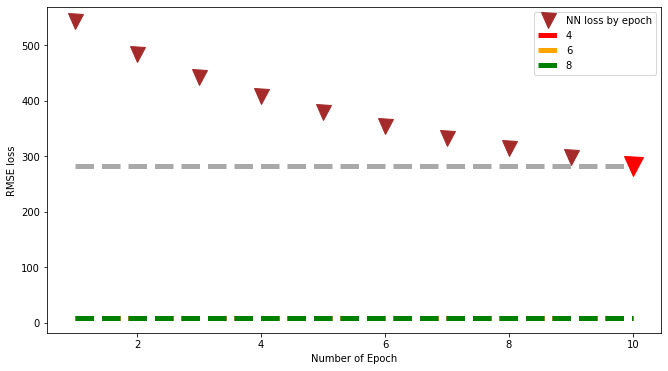

Best quality on Epoch 10, RMSE = 283.33


In [27]:
#### 0 #### 300
train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=16)

model0 = nn.Sequential(
    nn.Linear(90, 1)  

)
optimizer = torch.optim.SGD(model0.parameters(), lr= 5e-9)
criterion = nn.MSELoss()

y_train_mean = 0.0
y_train_std = 1.0

y_train = (y_train - y_train_mean)/y_train_std
y_test = (y_test - y_train_mean)/y_train_std

train(10, model0, optimizer, criterion, train_loader, test_loader, GRAPH = True)

## Обработаем признаки и таргет.

In [28]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


In [29]:
y_train_mean = np.mean(y_train)
y_train_std = np.std(y_train)

y_train = (y_train - y_train_mean)/y_train_std
y_test = (y_test - y_train_mean)/y_train_std

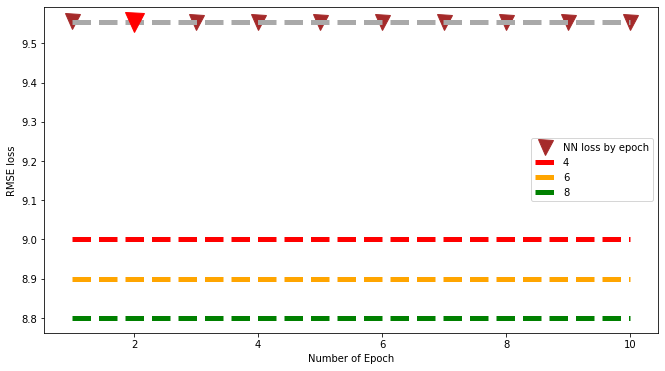

Best quality on Epoch 2, RMSE = 9.56


In [32]:
#### 1 #### 12

train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=16)

model1 = nn.Sequential(
    nn.Linear(90, 1)  

)
optimizer = torch.optim.SGD(model1.parameters(), lr= 0.0005)
criterion = nn.MSELoss()

train(10, model1, optimizer, criterion, train_loader, test_loader, GRAPH = True)

Чуть лучше, чем просто константный прогноз.

## Эксперимент 1
# Двигаем архитектуру
Добавляем нелинейность \
Уже лучше

## +1 слой

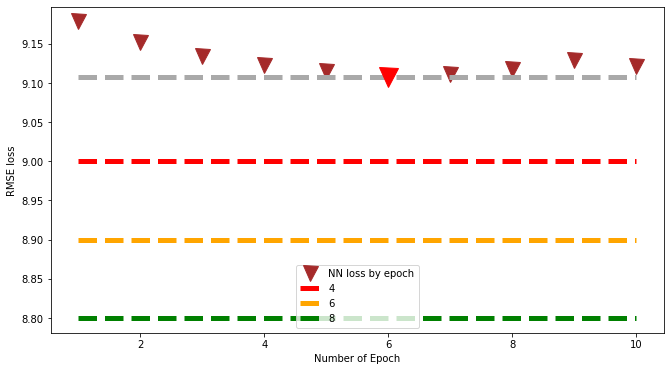

Best quality on Epoch 6, RMSE = 9.11


In [34]:
#### 2 #### 9
model2 = nn.Sequential(
    nn.Linear(90, 10),
    nn.ReLU(),
    nn.Linear(10, 1)  

)
optimizer = torch.optim.SGD(model2.parameters(), lr= 0.005)
criterion = nn.MSELoss()

train(10, model2, optimizer, criterion, train_loader, test_loader, GRAPH = True)

Лучше чем константа!

## Добавим еще слой + оптимизатор

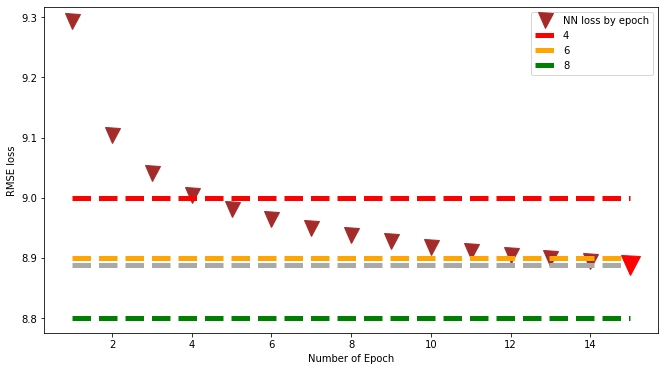

Best quality on Epoch 15, RMSE = 8.89


In [37]:
#### 3 #### 8.91
model3 = nn.Sequential(
    nn.Linear(90, 30),   
    nn.ReLU(),          
    nn.Linear(30, 10),
    nn.ReLU(),          
    nn.Linear(10, 1)
)
optimizer = torch.optim.SGD(model3.parameters(), lr= 0.0005)
criterion = nn.MSELoss()

train(15, model3, optimizer, criterion, train_loader, test_loader, GRAPH = True)

Попробуем другой оптимозатор.

## Итог график

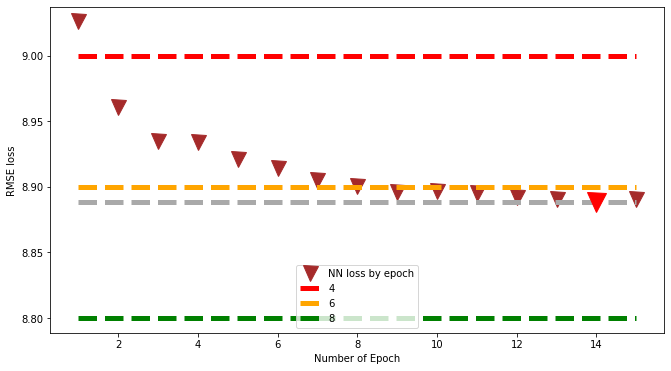

Best quality on Epoch 14, RMSE = 8.89


In [36]:
#### 4 #### 8.87
model4 = nn.Sequential(
    nn.Linear(90, 30),  
    nn.ReLU(),         
    nn.Linear(30, 10),
    nn.ReLU(),       
    nn.Linear(10, 1)
)
optimizer = torch.optim.Adam(model4.parameters(), lr= 0.0005)
criterion = nn.MSELoss()

train(15, model4, optimizer, criterion, train_loader, test_loader, GRAPH = True)

## Эксперимент 2
# Подберем гиперпараметры

Подвигаем размер батча:

## Графики

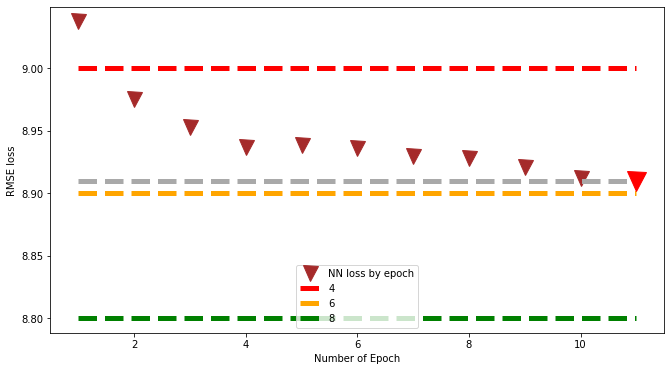

Best quality on Epoch 11, RMSE = 8.91


In [38]:
#### 4 #### 8.87

train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=8)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=8)

model4 = nn.Sequential(
    nn.Linear(90, 30),  
    nn.ReLU(),         
    nn.Linear(30, 10),
    nn.ReLU(),       
    nn.Linear(10, 1)
)
optimizer = torch.optim.Adam(model4.parameters(), lr= 0.0005)
criterion = nn.MSELoss()

train(11, model4, optimizer, criterion, train_loader, test_loader, GRAPH = True)

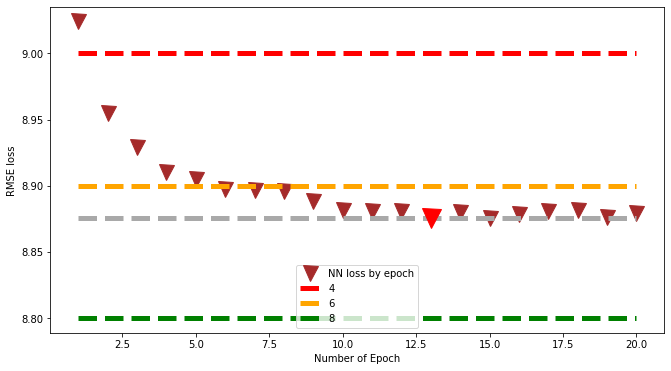

Best quality on Epoch 13, RMSE = 8.88


In [39]:
#### 4 #### 8.87

train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32)

model4 = nn.Sequential(
    nn.Linear(90, 30),  
    nn.ReLU(),         
    nn.Linear(30, 10),
    nn.ReLU(),       
    nn.Linear(10, 1)
)
optimizer = torch.optim.Adam(model4.parameters(), lr= 0.0005)
criterion = nn.MSELoss()

train(20, model4, optimizer, criterion, train_loader, test_loader, GRAPH = True)

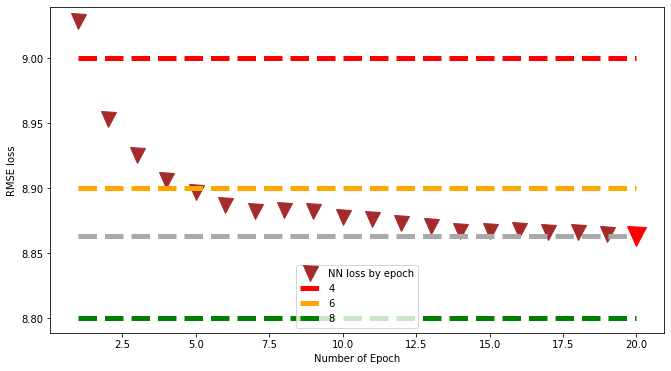

Best quality on Epoch 20, RMSE = 8.86


In [40]:
#### 4 #### 8.87

train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64)

model5 = nn.Sequential(
    nn.Linear(90, 30),  
    nn.ReLU(),         
    nn.Linear(30, 10),
    nn.ReLU(),       
    nn.Linear(10, 1)
)
optimizer = torch.optim.Adam(model5.parameters(), lr= 0.0005)
criterion = nn.MSELoss()

train(20, model5, optimizer, criterion, train_loader, test_loader, GRAPH = True)

## Лучший результат:

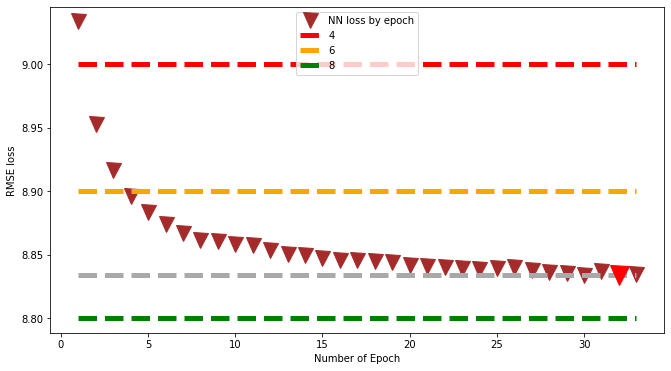

Best quality on Epoch 32, RMSE = 8.83


In [41]:
#### 7 #### 8.86

set_random_seed(23)

train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128)

model6 = nn.Sequential(
    nn.Linear(90, 30),  
    nn.ReLU(),         
    nn.Linear(30, 10),
    nn.ReLU(),       
    nn.Linear(10, 1)
)
optimizer = torch.optim.Adam(model6.parameters(), lr= 0.0005)
criterion = nn.MSELoss()

train(33, model6, optimizer, criterion, train_loader, test_loader, GRAPH = True)

При большем размере батча сильнее переобучается.

## Снова подвигаем архитектуру.
Вторая эпоха

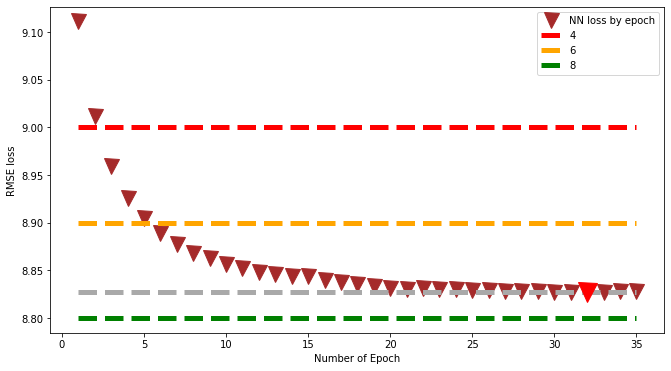

Best quality on Epoch 32, RMSE = 8.83


In [42]:
#### 7 #### 8.86

set_random_seed(23)

train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128)

model7 = nn.Sequential(
    nn.Linear(90, 65),  
    nn.ReLU(),         
    nn.Linear(65, 30),
    nn.ReLU(),       
    nn.Linear(30, 1)
)
optimizer = torch.optim.Adam(model7.parameters(), lr= 0.0002)
criterion = nn.MSELoss()

train(35, model7, optimizer, criterion, train_loader, test_loader, GRAPH = True)

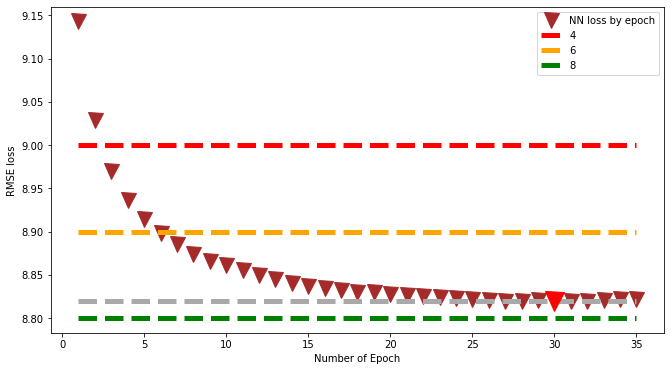

Best quality on Epoch 30, RMSE = 8.82


In [43]:
#### 7 #### 8.86

set_random_seed(23)

train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128)

model7 = nn.Sequential(
    nn.Linear(90, 65),  
    nn.ReLU(),         
    nn.Linear(65, 20),
    nn.ReLU(),       
    nn.Linear(20, 1)
)
optimizer = torch.optim.Adam(model7.parameters(), lr= 0.0002)
criterion = nn.MSELoss()

train(35, model7, optimizer, criterion, train_loader, test_loader, GRAPH = True)

## Добавим слой

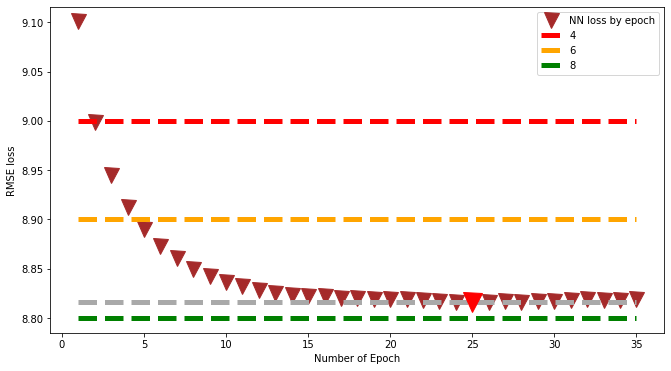

Best quality on Epoch 25, RMSE = 8.82


In [44]:
#### 7 #### 8.86

set_random_seed(23)

train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128)

model7 = nn.Sequential(
    nn.Linear(90, 65),  
    nn.ReLU(),         
    nn.Linear(65, 30),
    nn.ReLU(),       
    nn.Linear(30, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)
optimizer = torch.optim.Adam(model7.parameters(), lr= 0.0002)
criterion = nn.MSELoss()

train(35, model7, optimizer, criterion, train_loader, test_loader, GRAPH = True)

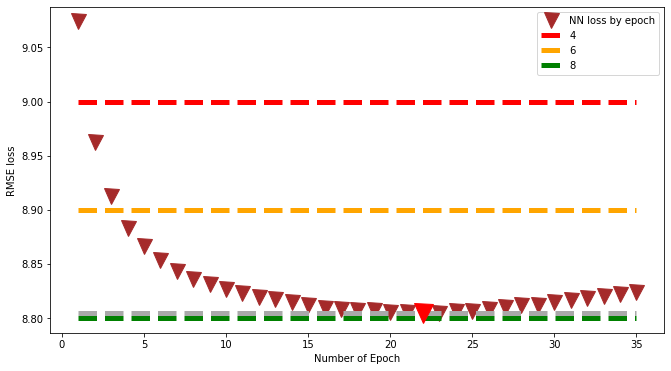

Best quality on Epoch 22, RMSE = 8.80


In [45]:
#### 7 #### 8.86

set_random_seed(23)

train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128)

model7 = nn.Sequential(
    nn.Linear(90, 65),  
    nn.ReLU(),         
    nn.Linear(65, 30),
    nn.ReLU(),       
    nn.Linear(30, 9),
    nn.ReLU(),
    nn.Linear(9, 1)
)
optimizer = torch.optim.Adam(model7.parameters(), lr= 0.0002)
criterion = nn.MSELoss()

train(35, model7, optimizer, criterion, train_loader, test_loader, GRAPH = True)

## Лучший результат

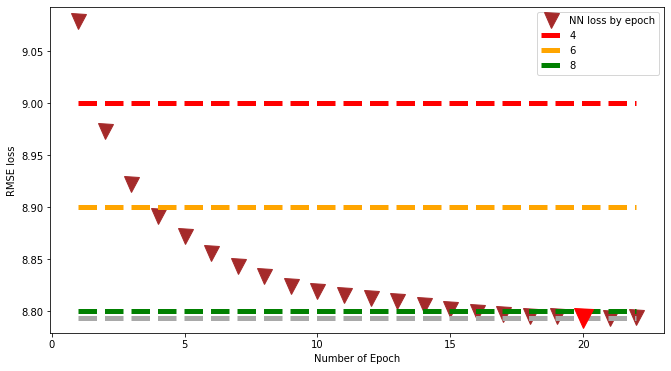

Best quality on Epoch 20, RMSE = 8.79


In [46]:
#### 7 #### 8.86

set_random_seed(23)

train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128)

model7 = nn.Sequential(
    nn.Linear(90, 64),  
    nn.ReLU(),         
    nn.Linear(64, 30),
    nn.ReLU(),       
    nn.Linear(30, 9),
    nn.ReLU(),
    nn.Linear(9, 1)
)
optimizer = torch.optim.Adam(model7.parameters(), lr= 0.0002)
criterion = nn.MSELoss()

train(22, model7, optimizer, criterion, train_loader, test_loader, GRAPH = True)

# Эксперимент 3

## Не будем учитывать неполный батч, и сделаем условие остановки

In [69]:
def epoch_new(model, optimizer, criterion, train_loader, test_loader):

    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''

    for epoch in range(1):                               
        for x_train, y_train in train_loader: 
            if x_train.shape[0] == bs:
                y_pred = model(x_train).squeeze(1)       
                loss = criterion(y_pred, y_train.to(torch.float32))                   
                loss.backward()                        
                optimizer.step()                             
                optimizer.zero_grad()      

def train_new(num_epoch, model, optimizer, criterion, train_loader, test_loader, GRAPH = False):
    '''
    params:
        num_epoch - num of epoch
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
        GRAPH - if True, graph will be plotted, defalte = False
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    
    err_dat_test = np.empty(num_epoch)
    #err_dat_train = np.empty(num_epoch)

    for ep in range(num_epoch):
        epoch_new(model, optimizer, criterion, train_loader, test_loader)
        y_predict_test = test(model, criterion, test_loader)
        err = mse(y_predict_test*y_train_std + y_train_mean, y_test*y_train_std + y_train_mean, squared=False)
        err_dat_test[ep] = err


        if GRAPH:
            if ep == 0:
                continue
            if err_dat_test[ep-1] < err_dat_test[ep] - 0.0001:
                break            
            min_ = np.argmin(err_dat_test[:ep+1])

            clear_output(True)
            plt.figure(figsize=(11,6))

            plt.plot(np.array(range(ep+1))+1, err_dat_test[:ep+1], 'v', c='brown', ms=15, label='NN loss by epoch')
            # plt.plot(np.array(range(ep+1))+1, err_dat_train[:ep+1], 'v', c='darkgreen', ms=15)

            plt.plot([1, ep+1], [err_dat_test[min_], err_dat_test[min_]], '--', c='darkgray', lw=5) 

            plt.plot([1, ep+1], [9.0, 9.0], '--', c='red', lw=5, label='4') 
            plt.plot([1, ep+1], [8.9, 8.9], '--', c='orange', lw=5, label='6')
            plt.plot([1, ep+1], [8.8, 8.8], '--', c='green', lw=5, label='8') 
            plt.plot([min_+1],[err_dat_test[min_]], 'v', c='red', ms=19)

            plt.xlabel('Number of Epoch')
            plt.ylabel('RMSE loss')
            plt.legend()

            plt.show()

            print(('Best quality on Epoch {}, RMSE = {:.2f}'.format(min_+1 ,err_dat_test[min_])))


## Графики

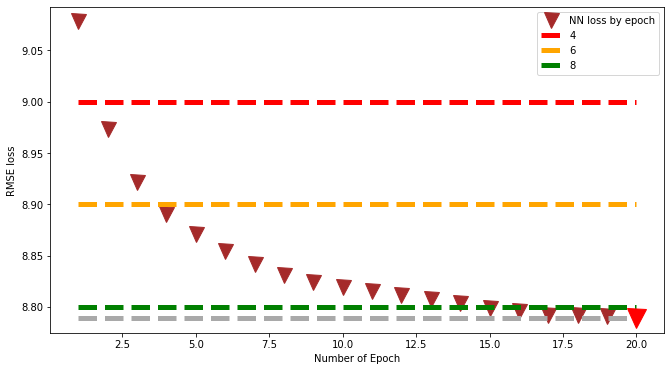

Best quality on Epoch 20, RMSE = 8.79


In [73]:
#### 7 #### 8.86

set_random_seed(23)

bs = 128

train_set = Data_set(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=bs)

test_set = Data_set(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=bs)

model7 = nn.Sequential(
    nn.Linear(90, 64),  
    nn.ReLU(),         
    nn.Linear(64, 30),
    nn.ReLU(),       
    nn.Linear(30, 9),
    nn.ReLU(),
    nn.Linear(9, 1)
)
optimizer = torch.optim.Adam(model7.parameters(), lr= 0.0002)
criterion = nn.MSELoss()

train_new(50, model7, optimizer, criterion, train_loader, test_loader, GRAPH = True)